**Multiple Linear Regression using stock prices**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')

font = {'family': 'serif',
        'weight': 'bold',
        'size': 18}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (15, 8)

from sklearn import linear_model

In [19]:
## Preparing the data

Stock_Market = {'Year':
                [2017] * 12 + [2016] * 12,
                'Month':
                [i for i in range(12, 0, -1)] * 2,
                'Interest_Rate':
                [2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
                'Unemployment_Rate':
                [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6, 5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1],
                'Stock_Index_Price':
                [1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719],
                }

df = pd.DataFrame(Stock_Market, 
                  columns = ['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate', 'Stock_Index_Price'])

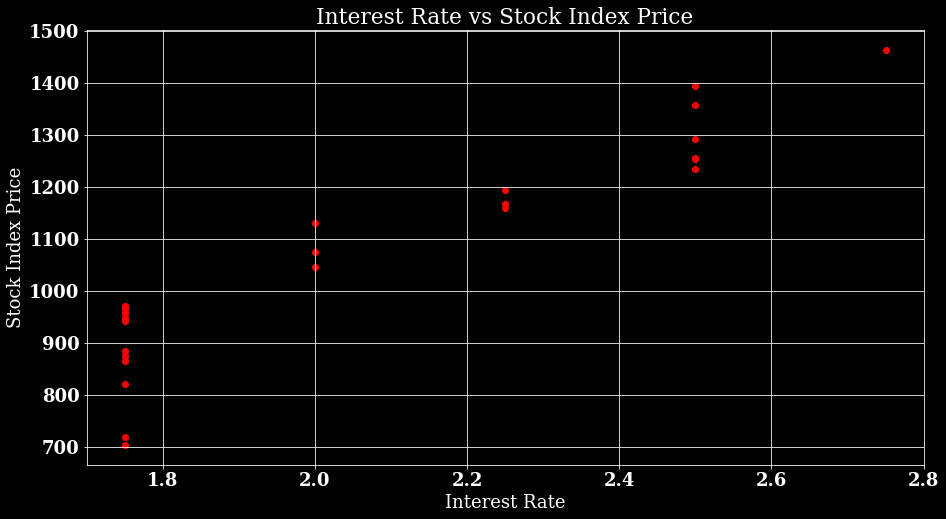

In [25]:
## checking for linearity between stock prices and interest rate

plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Interest Rate vs Stock Index Price')
plt.grid()

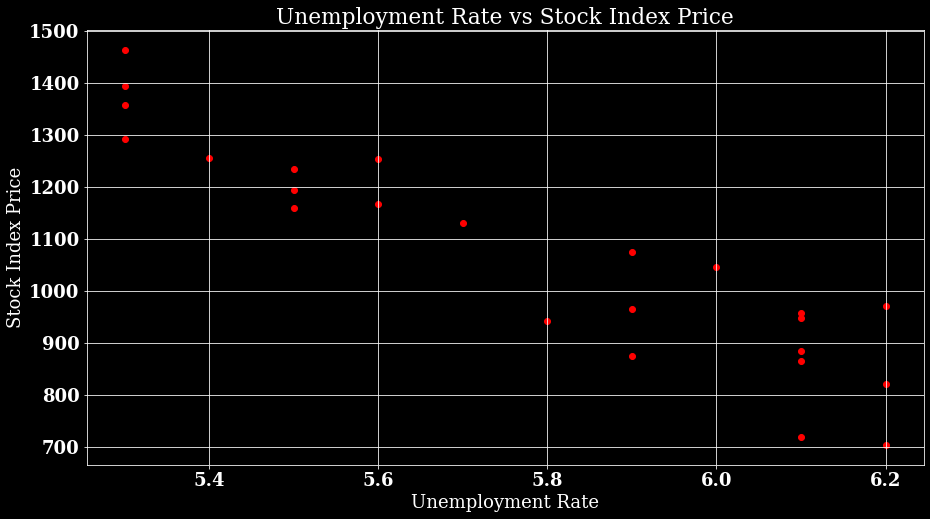

In [26]:
## checking for linearity between stock prices and unemployment rate

plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color = 'red')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')
plt.title('Unemployment Rate vs Stock Index Price')
plt.grid()

In [50]:
## Features and target

features = ['Interest_Rate', 'Unemployment_Rate']

x = df.copy()

X = x[features]
y = x.pop('Stock_Index_Price')

In [51]:
## Linear regression to find the best fit intercept and slope

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept of the model: ', regr.intercept_)
print('Slope(s) of the model: ', regr.coef_)

Intercept of the model:  1798.4039776258546
Slope(s) of the model:  [ 345.54008701 -250.14657137]


In [52]:
# Making predictions

New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3

print('Predicted stock price: ', regr.predict([[New_Interest_Rate, New_Unemployment_Rate]]))

Predicted stock price:  [1422.86238865]


In [64]:
## How good is our fit? Let's compute the coefficient of determination

ys = np.array(df['Stock_Index_Price'])

beta_1 = regr.coef_[0]
beta_2 = regr.coef_[1]
inter = regr.intercept_

x_1 = np.array(df[features[0]])
x_2 = np.array(df[features[1]])

pred = beta_1 * x_1 + beta_2 * x_2 + inter 

residuals = [ys - pred]

## r-squared is a term used for the coefficient of determination

r_squared = 1 - np.var(residuals) / np.var(ys)

print('Coefficient of determination using the given features: ', r_squared)

Coefficient of determination using the given features:  0.8976335894170216


The r_squared for our model is fairly huge, demonstrating the robustness of our model!

**What if we use the features individually for making predictions, perhaps?**

1. Using the 'Interest rate' variable only for making predictions

In [67]:
model1 = linear_model.LinearRegression()

model1.fit(np.array(df['Interest_Rate']).reshape(-1, 1), y)

slope = model1.coef_
inter = model1.intercept_
x1 = np.array(df['Interest_Rate'])

pred = slope * x1 + inter
residuals = [ys - pred]

r_squared = 1 - np.var(residuals) / np.var(ys)

print('Coefficient of determination using only the interest rate: ', r_squared)

Coefficient of determination using only the interest rate:  0.8757089547891358


2. Using the 'Unemployment rate' variable only for making predictions

In [69]:
model2 = linear_model.LinearRegression()

model2.fit(np.array(df['Unemployment_Rate']).reshape(-1, 1), y)

slope = model2.coef_
inter = model2.intercept_
x2 = np.array(df['Unemployment_Rate'])

pred = slope * x2 + inter
residuals = [ys - pred]

r_squared = 1 - np.var(residuals) / np.var(ys)

print('Coefficient of determination using only the unemployment rate: ', r_squared)

Coefficient of determination using only the unemployment rate:  0.850706607677214


In [75]:
print('Prediction using the actual model (using both the features together): ', regr.predict([[New_Interest_Rate, New_Unemployment_Rate]]))
print('Prediction using model1 (using interest rate as feature only): ', model1.predict([[New_Interest_Rate]]))
print('Prediction using model2 (using unemployment rate as feature only): ', model2.predict([[New_Unemployment_Rate]]))

Prediction using the actual model (using both the features together):  [1422.86238865]
Prediction using model1 (using interest rate as feature only):  [1452.09638554]
Prediction using model2 (using unemployment rate as feature only):  [1349.84031936]


**Conclusion**

Even though the coefficient of determination is substantially high using both the features together, it is not insignifacnt when taking those features individually.